In [1]:
# -*- coding: utf-8 -*-

import meep as mp
import numpy as np
import matplotlib.pyplot as plt

resolution = 50 # pixels/μm

cell_size = mp.Vector3(14,10,0)

pml_layers = [mp.PML(thickness=2,direction=mp.X)]

# rotation angle (in degrees) of planewave, counter clockwise (CCW) around z-axis
rot_angle = np.radians(30)

fsrc = 1.0 # frequency of planewave (wavelength = 1/fsrc)

n = 1.5 # refractive index of homogeneous material
default_material = mp.Medium(index=n)

k_point = mp.Vector3(fsrc*n).rotate(mp.Vector3(z=1), rot_angle)

sources = [mp.EigenModeSource(src=mp.ContinuousSource(fsrc),
                              center=mp.Vector3(),
                              size=mp.Vector3(y=10),
                              direction=mp.AUTOMATIC if rot_angle == 0 else mp.NO_DIRECTION,
                              eig_kpoint=k_point,
                              eig_band=1,
                              eig_parity=mp.EVEN_Y+mp.ODD_Z if rot_angle == 0 else mp.ODD_Z,
                              eig_match_freq=True)]

sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    k_point=k_point,
                    default_material=default_material,
                    symmetries=[mp.Mirror(mp.Y)] if rot_angle == 0 else [])

sim.run(until=100)

-----------
Initializing structure...
Meep: using complex fields.
Meep progress: 5.24/100.0 = 5.2% done in 4.0s, 72.4s to go
Meep progress: 11.44/100.0 = 11.4% done in 8.0s, 62.0s to go
Meep progress: 17.650000000000002/100.0 = 17.7% done in 12.0s, 56.0s to go
Meep progress: 23.73/100.0 = 23.7% done in 16.0s, 51.5s to go
Meep progress: 29.8/100.0 = 29.8% done in 20.0s, 47.2s to go
Meep progress: 35.59/100.0 = 35.6% done in 24.0s, 43.5s to go
Meep progress: 41.4/100.0 = 41.4% done in 28.0s, 39.7s to go
Meep progress: 47.39/100.0 = 47.4% done in 32.0s, 35.6s to go
Meep progress: 53.51/100.0 = 53.5% done in 36.0s, 31.3s to go
Meep progress: 59.58/100.0 = 59.6% done in 40.0s, 27.2s to go
Meep progress: 65.6/100.0 = 65.6% done in 44.0s, 23.1s to go
Meep progress: 71.72/100.0 = 71.7% done in 48.0s, 18.9s to go
Meep progress: 77.8/100.0 = 77.8% done in 52.0s, 14.9s to go
Meep progress: 83.92/100.0 = 83.9% done in 56.0s, 10.7s to go
Meep progress: 90.04/100.0 = 90.0% done in 60.1s, 6.6s to go


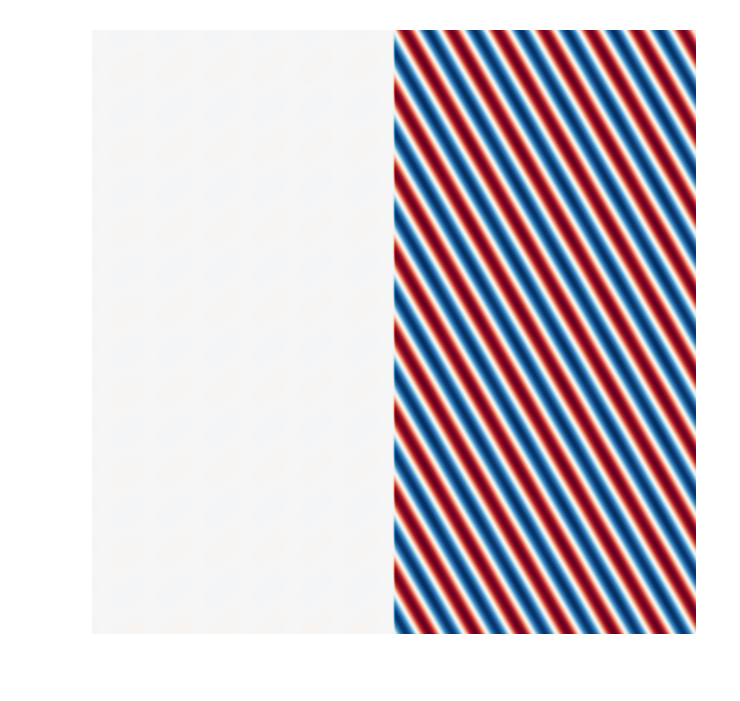

In [2]:
nonpml_vol = mp.Volume(center=mp.Vector3(), size=mp.Vector3(10,10,0))
ez_data = sim.get_array(vol=nonpml_vol, component=mp.Ez)

plt.figure(dpi=200)
plt.imshow(np.flipud(np.transpose(np.real(ez_data))), interpolation='spline36', cmap='RdBu')
plt.axis('off')
plt.show()